In [32]:
import os
import glob
import re 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

#### 1. Reading the data

In [95]:
## Convert csv to parquet format to reduce dimension
## This is done once to load the data
## df = pd.read_csv("../../data/eda/flights/flight_data_082022/flight_data_082022.csv", low_memory=False)
# df.to_parquet("../../data/eda/flights/flight_data_082022/flight_data_082022.parquet",engine='fastparquet')
# merging 2022 csv files
rpath2022 = "../../data/eda/flights/flight_data_*2022/flight_data_*2022.csv"

all_files = glob.glob(rpath2022, recursive=True)

[f for f in all_files]

df = pd.concat((pd.read_csv(f, low_memory=False) for f in all_files), ignore_index=True)
df.to_parquet("../../data/eda/flights/flight_data_2022/flight_data_2022.parquet",engine='fastparquet')

df.tail()

##df_flights = pd.read_parquet("../../data/eda/flights/flight_data_082022/flight_data_082022.parquet")

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
1177381,2022,3,8,10,3,2022-08-10,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1177382,2022,3,8,16,2,2022-08-16,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1177383,2022,3,8,17,3,2022-08-17,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1177384,2022,3,8,18,4,2022-08-18,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1177385,2022,3,8,19,5,2022-08-19,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


#### 2. Data Preparation
- Identifying duplicated columns
- Renaming columns
- Dropping irrelevant columns and rows
- Feature selection

In [55]:
## clean the data by removing spaces
df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
df_flights["Cancelled"] = df_flights["Cancelled"].astype("bool")

##### Understanding the data

In [56]:
df_flights.columns.to_list()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'D

In [57]:
df_flights.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Duplicate            object
Unnamed: 119        float64
Length: 120, dtype: object

In [58]:
df_flights.shape

(613649, 120)

In [59]:
df_flights.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
613644,2022,3,8,10,3,2022-08-10,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
613645,2022,3,8,16,2,2022-08-16,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
613646,2022,3,8,17,3,2022-08-17,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
613647,2022,3,8,18,4,2022-08-18,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
613648,2022,3,8,19,5,2022-08-19,AA,AA_CODESHARE,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [60]:
df_flights.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
count,613649.0,613649.0,613649.0,613649.000000,613649.000000,613649.000000,613649.000000,22.000000,22.000000,613649.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2022.0,3.0,8.0,15.923297,3.789419,19822.784413,2511.279560,20397.454545,4685.363636,19970.296327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.946089,2.008312,279.213866,1689.897973,33.651898,996.653713,377.716938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022.0,3.0,8.0,1.000000,1.000000,19393.000000,1.000000,20304.000000,3351.000000,19393.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022.0,3.0,8.0,8.000000,2.000000,19790.000000,1118.000000,20378.000000,3936.000000,19790.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022.0,3.0,8.0,16.000000,4.000000,19805.000000,2234.000000,20398.000000,4257.000000,19930.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.0,3.0,8.0,24.000000,5.000000,19977.000000,3727.000000,20398.000000,5737.250000,20368.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.0,3.0,8.0,31.000000,7.000000,20436.000000,9678.000000,20452.000000,6032.000000,20500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Analysis of Features
Identification of Potential Features 
- Time Series Features:
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'FlightDate',
- Flight Info:
    - Airline: Marketing_Airline_Network
    - Origin: Origin, OriginCityName
    - Destination: Dest, DestCityName
- Departure / Delay Info:
    - CRSDepTime: Scheduled Departure
    - DepTime: Actual Departure
    - DepDelay: Departure Delay

In [61]:
df_flights.columns.to_list()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'D

#### Delays by Airline in 2022

In [62]:
airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
airlines = pd.read_csv(airline_csv)
## save locally
#airlines.to_csv("airlines.csv") 
airlines.query("Code == '9E'")
#airlines
airline_mapper = airlines.set_index("Code")["Description"]


In [63]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts.head()

WN    118889
DL     78673
AA     78327
OO     63713
UA     54918
Name: Operating_Airline, dtype: int64

In [64]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts
airline_counts.index=airline_counts.index.map(
    airlines.set_index('Code')['Description']
    ).rename("Airline")
airline_counts.head()

Airline
Southwest Airlines Co.    118889
Delta Air Lines Inc.       78673
American Airlines Inc.     78327
SkyWest Airlines Inc.      63713
United Air Lines Inc.      54918
Name: Operating_Airline, dtype: int64

<AxesSubplot: ylabel='Airline'>

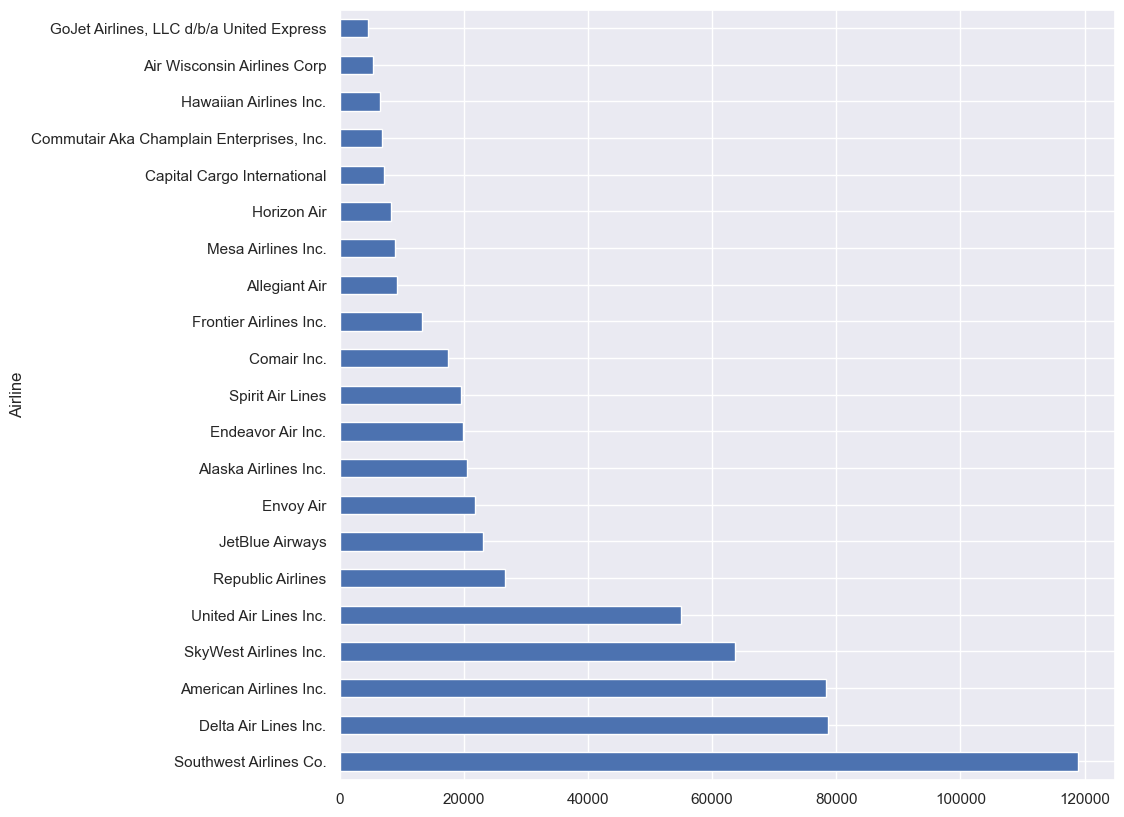

In [65]:
airline_counts.plot(kind='barh', figsize=(10,10))

<AxesSubplot: ylabel='Airline'>

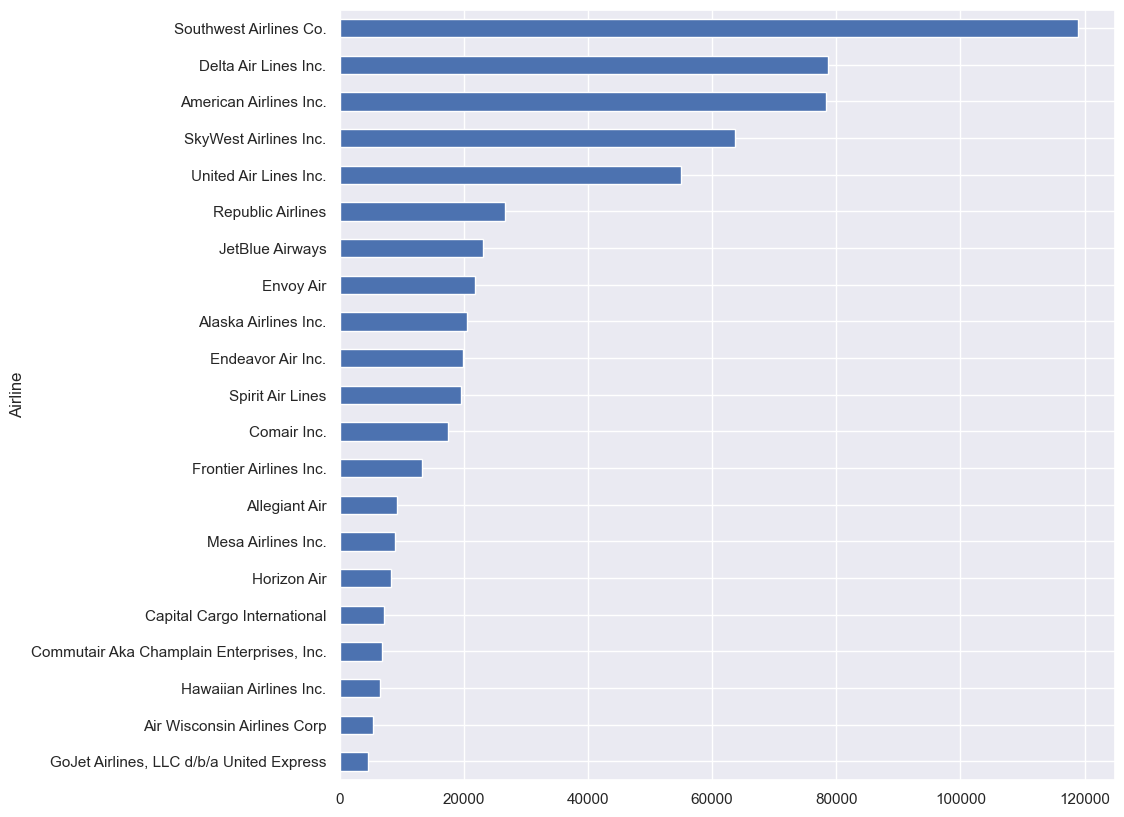

In [66]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [67]:
df_flights.query('Year == 2022').head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [68]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
Airline,
"GoJet Airlines, LLC d/b/a United Express",4517
Air Wisconsin Airlines Corp,5352
Hawaiian Airlines Inc.,6514
"Commutair Aka Champlain Enterprises, Inc.",6831
Capital Cargo International,7139
Horizon Air,8246
Mesa Airlines Inc.,8887
Allegiant Air,9282
Frontier Airlines Inc.,13337


In [69]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Operating_Airline<br>value=%{x}<br>Airline=%{y}<extra></extra>',
              'legendgroup': 'Operating_Airline',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Operating_Airline',
              'offsetgroup': 'Operating_Airline',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([  4517,   5352,   6514,   6831,   7139,   8246,   8887,   9282,  13337,
                           17392,  19581,  19893,  20514,  21858,  23100,  26686,  54918,  63713,
                           78327,  78673, 118889], dtype=int64),
              'xaxis': 'x',
              'y': array(['GoJet Airlines, LLC d/b/a United Express',
                          'Air Wisconsin Airlines Corp', 'Hawaiian Airlines Inc.',
                          'Commutair Aka Champlain Enterprises, Inc.',
                          'Capital Cargo International', 'Horizon Air', 'Mesa Airlines Inc.',
                          'Allegiant Air', 'Frontier Airlines Inc.', 'Comair Inc.',
                          'Spirit Air Lines', 'Endeavor Air Inc.', 'Alaska Airlines Inc.',
                          'Envoy Air', 'JetBlue Airways', 'Republic Airlines',
                          'United Air Lines Inc.', 'SkyWest Airlines Inc.',
                          'American Airlines Inc.', 'Delta Air Lines Inc.',
                          'Southwest Airlines Co.'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 700,
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Flights per airline'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Airline'}}}
})

In [ ]:
pct_cancelled = df_flights["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.03% of flights are cancelled


0.025231035983110866

In [ ]:
df_flights["Cancelled"].value_counts()

False    598166
True      15483
Name: Cancelled, dtype: int64

### Cancelled flights, group by Year

In [ ]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby(["Year"])["Cancelled"].agg("mean").to_frame()

,Cancelled
Year,
2022,0.025231


In [ ]:
cancelled_flights_analysis = (
    (df_flights.query("Year == 2022")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(airline_mapper)


In [ ]:
cancelled_flights_analysis.head()     ## TODO: add geographical information of flight, weather information

,Operating_Airline,Departed,Cancelled,Total,Pct_Cancelled,Airline
0,9E,18876,1017,19893,5.112351,Endeavor Air Inc.
1,AA,75025,3302,78327,4.215660,American Airlines Inc.
2,AS,20380,134,20514,0.653212,Alaska Airlines Inc.
3,B6,22549,551,23100,2.385281,JetBlue Airways
4,C5,6644,187,6831,2.737520,"Commutair Aka Champlain Enterprises, Inc."


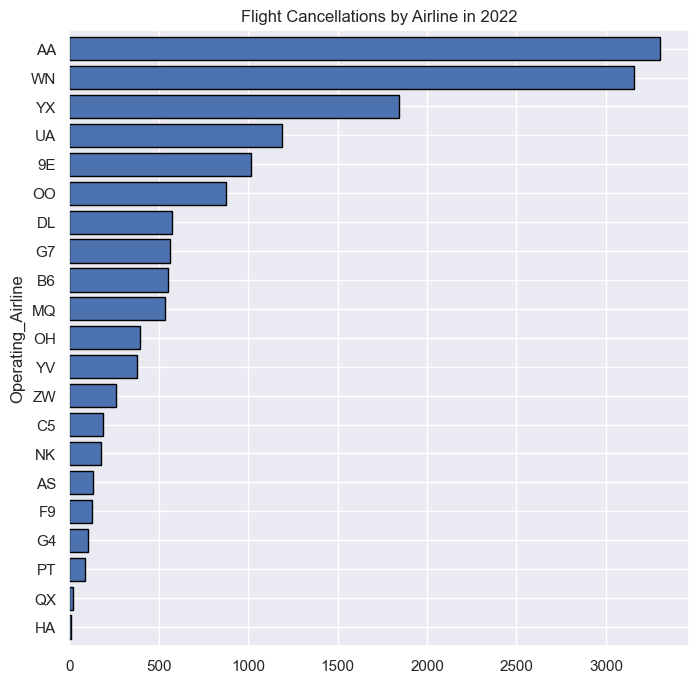

In [ ]:
cancelled_flights_analysis.set_index("Operating_Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   figsize=(8, 8), 
                                   width=.8,
                                   edgecolor="black",
                                   title="Flight Cancellations by Airline in 2022")
plt.show()

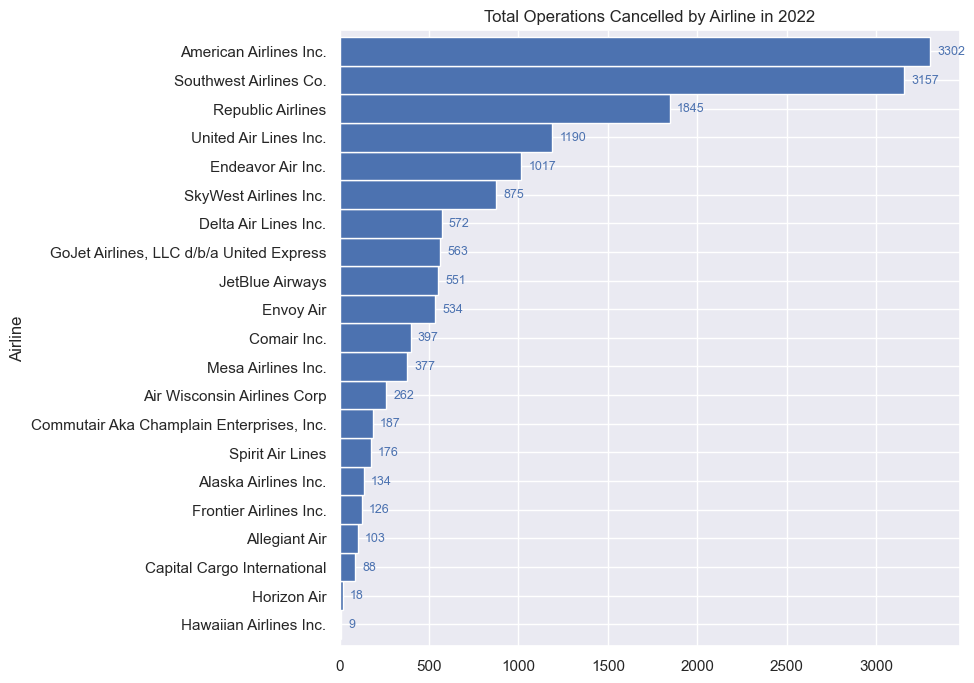

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
# cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
#     airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Cancelled")["Cancelled"].plot(kind="barh", 
                                   title="Total Operations Cancelled by Airline in 2022",
                                   width=1
                                   )

ax.bar_label(ax.containers[0], padding=5, fontsize=9, color='b')
plt.show()


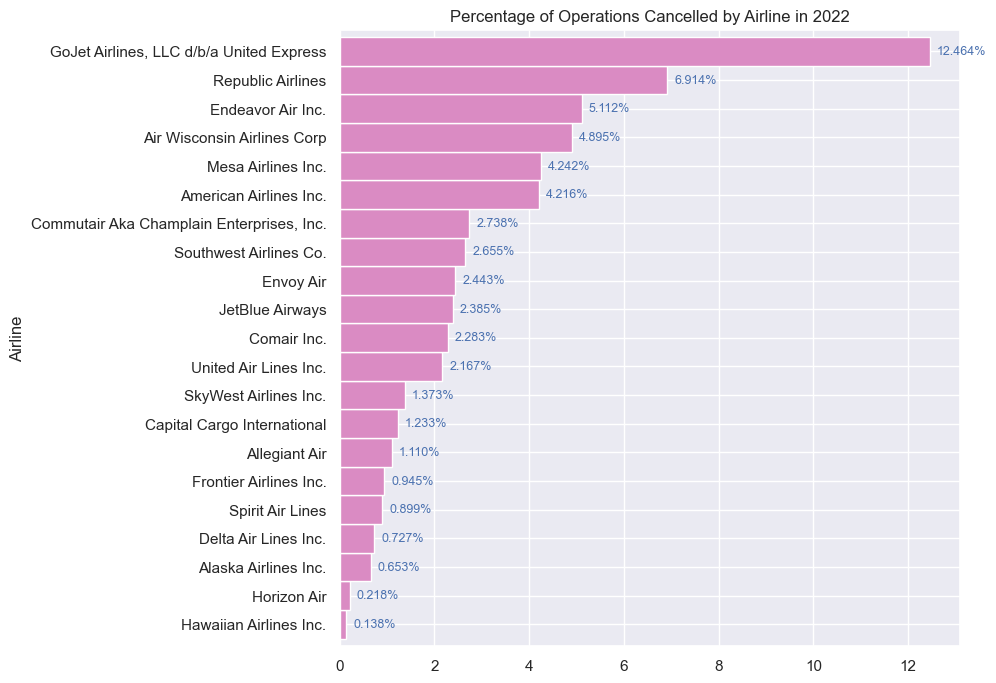

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis["Airline"] = cancelled_flights_analysis["Operating_Airline"].map(
    airline_mapper)
cancelled_flights_analysis.set_index("Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[6]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()

In [ ]:
cancel_count = df_flights.query("Year == 2022").query("Cancelled")["Operating_Airline"].value_counts()
cancel_count

AA    3302
WN    3157
YX    1845
UA    1190
9E    1017
OO     875
DL     572
G7     563
B6     551
MQ     534
OH     397
YV     377
ZW     262
C5     187
NK     176
AS     134
F9     126
G4     103
PT      88
QX      18
HA       9
Name: Operating_Airline, dtype: int64

In [ ]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]